In [30]:
import pandas as pd
import matplotlib.pyplot as plt

## Compare datasets perform analysis



In [31]:
hindcast = pd.read_csv('../data/wave_hindcast.csv', index_col = 0, parse_dates = True)

observations = pd.read_csv('../data/abbot_point.csv', index_col = 0, parse_dates = True)

<Axes: xlabel='DateTime'>

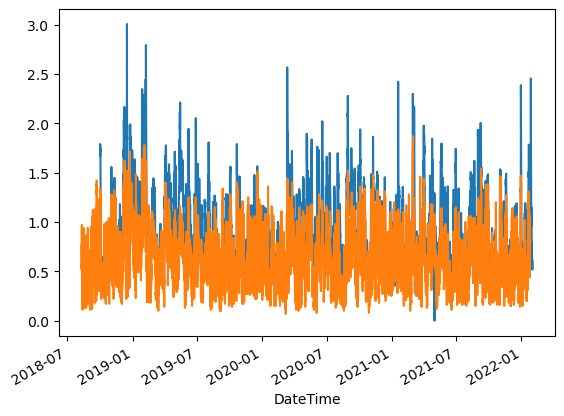

In [32]:
hindcast.hs.plot()
observations.Hsig.plot()

In [33]:
observations.columns

Index(['Hsig', 'Hmax', 'Tp', 'Tz', 'Direction'], dtype='object')

In [34]:
hindcast.columns

Index(['hs', 't02', 'dp', 'fp', 'uwnd', 'vwnd', 'longitude', 'latitude'], dtype='object')

In [35]:
hindcast['tp'] = 1/hindcast['fp']

In [45]:
merged_wave = pd.merge(observations[['Hsig', 'Tp', 'Tz', 'Direction']], hindcast[['hs','t02','tp','dp']], right_index = True, left_index = True)

In [46]:
merged_wave.columns

Index(['Hsig', 'Tp', 'Tz', 'Direction', 'hs', 't02', 'tp', 'dp'], dtype='object')

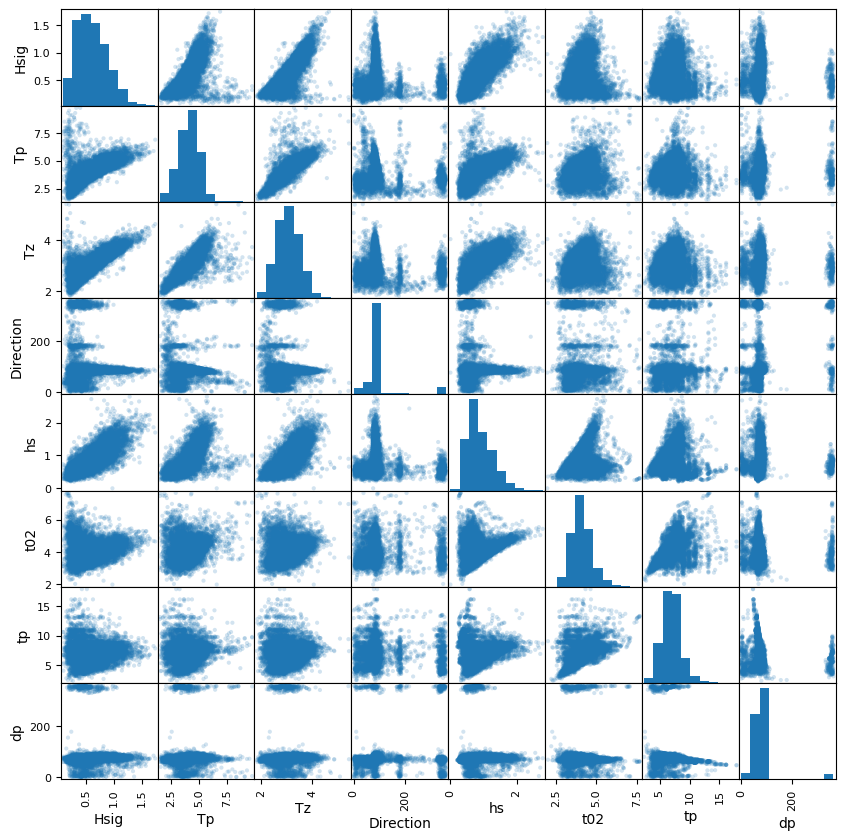

In [51]:
_ = pd.plotting.scatter_matrix(merged_wave, alpha = 0.2, figsize = (10,10))

Text(0.5, 1.0, 'Hs comparison')

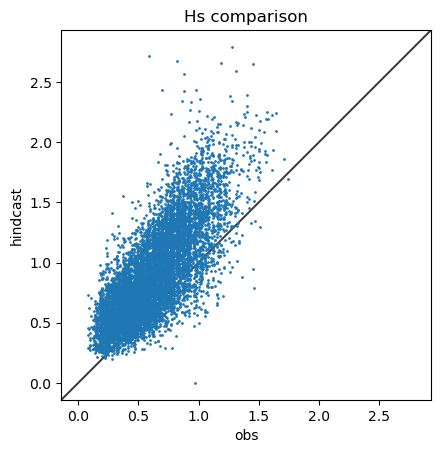

In [83]:
import numpy as np
fig, ax = plt.subplots()
ax.scatter(merged_wave['Hsig'].values, merged_wave['hs'], s = 1)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_xlabel('obs')
ax.set_ylabel('hindcast')
plt.title('Hs comparison')

Text(0.5, 1.0, 'Tz comparison')

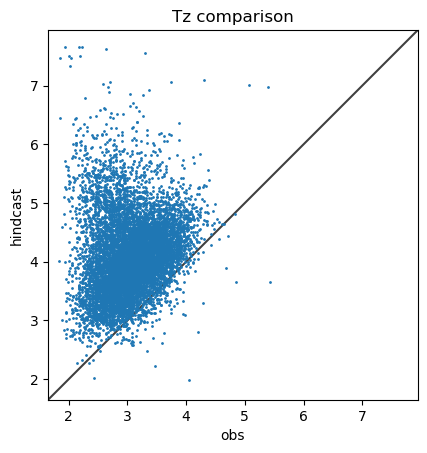

In [89]:
import numpy as np
fig, ax = plt.subplots()
ax.scatter(merged_wave['Tz'].values, merged_wave['t02'], s = 1)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_xlabel('obs')
ax.set_ylabel('hindcast')
plt.title('Tz comparison')

Text(0.5, 1.0, 'Tp comparison')

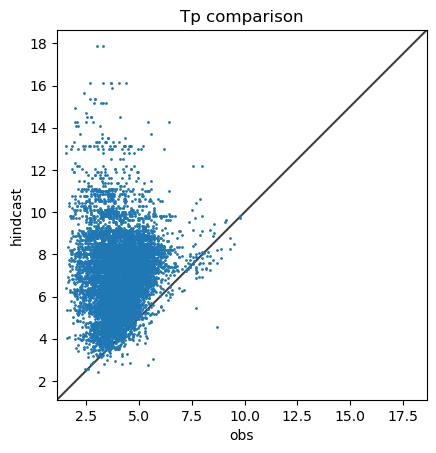

In [85]:
import numpy as np
fig, ax = plt.subplots()
ax.scatter(merged_wave['Tp'].values, merged_wave['tp'], s = 1)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_xlabel('obs')
ax.set_ylabel('hindcast')
plt.title('Tp comparison')